In [29]:
import warnings
from numba import jit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [30]:
# READ DATASET
df = pd.read_csv('./kendaraan_train_clean.csv')
df.sample(8)


,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
195204,-0.904855,-1.734651,0.756800,0.400806
106923,-0.178588,1.129876,0.851444,0.952065
182839,0.283583,0.278260,0.226793,-1.007968
95467,-1.036904,0.200841,0.756800,0.339555
205092,1.273948,0.123421,0.188935,1.197069
202707,-0.970880,-1.812070,0.908230,0.682561
242611,-0.640758,0.123421,0.832515,0.033300
223531,-0.112563,-1.966910,0.813586,0.070050


In [31]:
SELECTED_COLUMN=["Kanal_Penjualan", "Umur"]
df_clean = df[SELECTED_COLUMN]
df_clean.head()

,Kanal_Penjualan,Umur
0,0.756800,-0.574734
1,-1.571444,0.613705
2,0.908230,-1.168953
3,0.226793,1.273948
4,-0.454644,0.745754


In [32]:
@jit #comment this line if you can't run this file
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))
    
def initCentroid(k, df):
  return {i: df[random.randint(0, len(df))] for i in range(k)}

@jit
def kmeans(k, max_iter, df):
    centroid = initCentroid(k, df)
    print("="*40)
    print("INIT CENTROID")
    for i in range(k):
      print(f"Klaster {i+1}: {centroid.get(i)}")

    temp_centroid = centroid.copy()
    for i in range(max_iter):
        cluster = {i: [] for i in range(k)}
        tmp = []        
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            tmp.append(min(dist))
            cluster[dist.index(min(dist))].append(x)
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)
        print("="*40)
        print(f"ITERASI KE-{i+1}")
        for cl in range(k):
          print(f"Klaster {cl+1}: {centroid.get(cl)}")        
        isMatch = True
        for j in range(k):
          if (temp_centroid.get(j) != centroid.get(j))[0]:
            isMatch = False
        if isMatch:
          print(f"BERHENTI PADA ITERASI KE {i+1}")
          break
        temp_centroid = centroid.copy()
    return centroid, cluster

In [33]:
data = df_clean.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 3
max_iter = 100

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, max_iter, data)

INIT CENTROID
Klaster 1: [0.85144359 0.94382662]
Klaster 2: [ 0.18893525 -1.16895293]
Klaster 3: [ 0.22679287 -0.24461187]
ITERASI KE-1
Klaster 1: [-0.17098306  1.43460179]
Klaster 2: [ 0.64300148 -0.99679101]
Klaster 3: [-0.42311262  0.12553009]
ITERASI KE-2
Klaster 1: [-0.50108038  1.52983111]
Klaster 2: [ 0.72511888 -0.81985414]
Klaster 3: [-0.77419418  0.22418847]
ITERASI KE-3
Klaster 1: [-0.51407098  1.58163715]
Klaster 2: [ 0.68598358 -0.73028667]
Klaster 3: [-0.99958034  0.30500195]
ITERASI KE-4
Klaster 1: [-0.38929814  1.55788433]
Klaster 2: [ 0.64598625 -0.64953408]
Klaster 3: [-1.37911745  0.37674763]
ITERASI KE-5
Klaster 1: [-0.2237395   1.50289058]
Klaster 2: [ 0.62912735 -0.61610841]
Klaster 3: [-1.64023443  0.46435288]
ITERASI KE-6
Klaster 1: [-0.0373992   1.41783759]
Klaster 2: [ 0.63329184 -0.63431682]
Klaster 3: [-1.64571077  0.57517451]
ITERASI KE-7
Klaster 1: [0.20791468 1.24435504]
Klaster 2: [ 0.63895817 -0.65810405]
Klaster 3: [-1.64465783  0.71871448]
ITERASI KE-

In [34]:
# membuat dataframe hasil clustering
df_cluster = []
for key in cluster.keys():
    for c in cluster.get(key):
        df_cluster.append((c[0], c[1], key))

df_cluster = pd.DataFrame(df_cluster)
df_cluster.columns = SELECTED_COLUMN + ['Cluster']
df_cluster.sample(8)

,Kanal_Penjualan,Umur,Cluster
283434,-1.098224,0.283583,2
180930,0.756800,-1.036904,1
221983,-1.647159,2.594436,2
80046,0.756800,-0.838831,1
36015,0.188935,0.811778,0
106098,0.226793,-0.112563,1
129815,0.851444,0.019486,1
46039,0.188935,0.811778,0


In [35]:
# membuat dataframe sesuai dengan cluster yang ada
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

clusterize.columns = col
clusterize.sample(8)

,Cluster 1,Cluster 2,Cluster 3
25684,"[0.226792865, 0.679729178]","[0.75679954, -1.036904205]","[-1.628230496, 0.745753539]"
2299,"[0.75679954, 0.151534291]","[0.908230018, -1.234977288]","[-1.931091452, 1.53804587]"
117083,NaN,"[0.75679954, -1.036904205]",NaN
24466,"[0.226792865, 0.547680456]","[0.75679954, -0.310636235]","[-1.628230496, 0.151534291]"
126370,NaN,"[0.908230018, -1.168952927]",NaN
1773,"[0.226792865, 0.08550993]","[0.75679954, -0.904855483]","[-1.628230496, -0.310636235]"
37284,"[0.226792865, 0.151534291]","[0.75679954, -1.036904205]","[-1.628230496, -1.102928566]"
133731,NaN,"[0.226792865, -0.244611874]",NaN


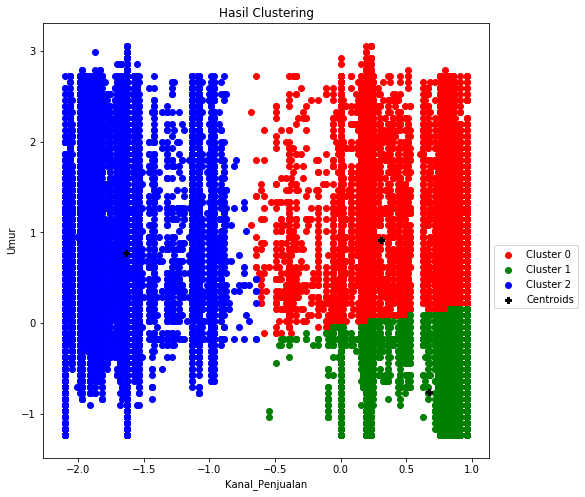

In [36]:
colors = ['r', 'g', 'blue', 'black']

plt.figure(figsize=(8, 8))
plt.title('Hasil Clustering')
for i in range(k):
    plt.scatter(
        df_cluster[SELECTED_COLUMN[0]][df_cluster['Cluster'] == i], 
        df_cluster[SELECTED_COLUMN[1]][df_cluster['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )
    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')
plt.xlabel(SELECTED_COLUMN[0])
plt.ylabel(SELECTED_COLUMN[1])
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

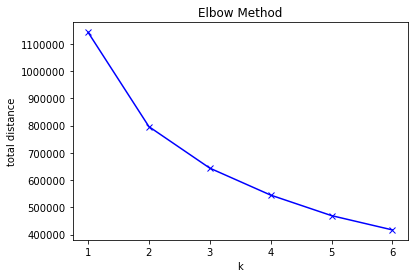

In [37]:
distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    distances.append(km.inertia_)

plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()